# Task 1: Get the dataset on screen

In [9]:
import pandas as pd
# read the dataset as pd dataform
base='blood_transfusion.csv'
mydata = pd.read_csv(base)
df = pd.DataFrame(data=mydata)
# check the info of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_since_last_donation   748 non-null    float64
 1   total_number_of_donations    748 non-null    float64
 2   total_blood_donated          748 non-null    float64
 3   months_since_first_donation  748 non-null    float64
 4   class                        748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


,months_since_last_donation,total_number_of_donations,total_blood_donated,months_since_first_donation,class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


From above, we obverse that 
1. no missing variable  
2. 5 variable in total. 4 of them is numerical, 1 is the Nominal

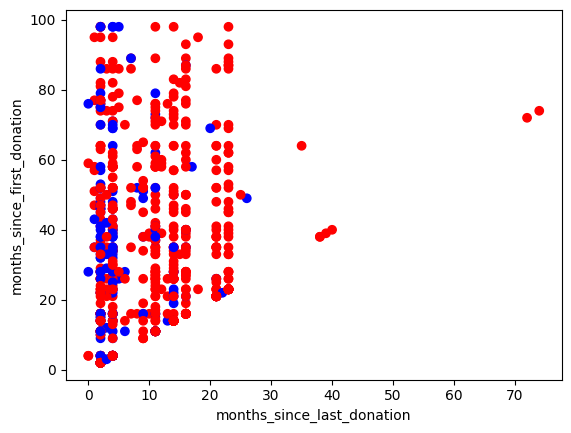

In [15]:
# visualize the data
import matplotlib.pyplot as plt

color = ['red' if cls == 0 else 'blue' for cls in df["class"]]

plot = plt.scatter(df["months_since_last_donation"], df["months_since_first_donation"], c=color)

plt.xlabel("months_since_last_donation")
plt.ylabel("months_since_first_donation")
plt.show()